## Q1

In [3]:
# Constants
pi = 3.1416
radius = 2.3

## Calculate the area of the circle and round it to 3 decimal places
area = round(pi * (radius ** 2), 3)

# Print the result
print("The first three digits of the area of the circle are:", area)

The first three digits of the area of the circle are: 16.619


## Q2

In [4]:
a = 250
b = 160

if b > a:
    print("b is greater than a")
elif a == b:
    print("a and b are equal")
else:
    print("b is less than a")


b is less than a


## Q3

In [5]:
# Input the year from the user
year = int(input("Enter a year: "))

# Check if it's a leap year
if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):
    print(year, "is a leap year")
else:
    print(year, "is not a leap year")


Enter a year: 2001
2001 is not a leap year


## Q4

In [6]:
# Input the mark from the user
mark = int(input("Enter the mark: "))

# Determine the grade based on the mark
if mark >= 90 and mark <= 100:
    grade = "A+"
elif mark >= 86 and mark <= 89:
    grade = "A"
elif mark >= 81 and mark <= 85:
    grade = "A-"
elif mark >= 76 and mark <= 80:
    grade = "B+"
elif mark >= 71 and mark <= 75:
    grade = "B"
elif mark >= 61 and mark <= 70:
    grade = "B-"
elif mark >= 51 and mark <= 60:
    grade = "C+"
elif mark >= 40 and mark <= 50:
    grade = "D"
else:
    grade = "Fail"

# Print the corresponding grade
print("Grade:", grade)


Enter the mark: 76
Grade: B+


## Q7

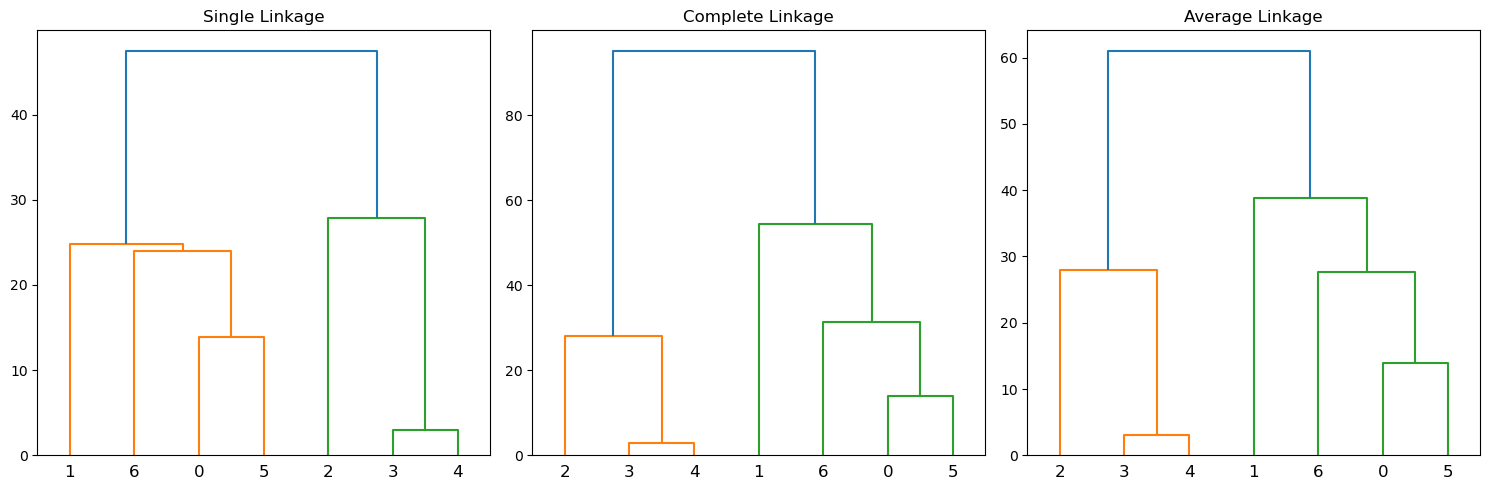

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import make_blobs


data = pd.read_csv(r"G:\Term 4.2\Data Mining\Lab\Lab Materials(Data Mining)\Data_with_Progms\Dat.csv")

# Calculate linkage matrices for different linkage methods
single_linkage = linkage(data, method='single')
complete_linkage = linkage(data, method='complete')
average_linkage = linkage(data, method='average')

# Create three subplots for the three dendrograms
plt.figure(figsize=(15, 5))

# Single linkage dendrogram
plt.subplot(131)
plt.title('Single Linkage')
dendrogram(single_linkage)

# Complete linkage dendrogram
plt.subplot(132)
plt.title('Complete Linkage')
dendrogram(complete_linkage)

# Average linkage dendrogram
plt.subplot(133)
plt.title('Average Linkage')
dendrogram(average_linkage)

plt.tight_layout()
plt.show()


## Q6

In [8]:
data = pd.read_csv(r"G:\Term 4.2\Data Mining\Lab\Lab Materials(Data Mining)\Data_with_Progms\Mall_customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
# Select relevant features (e.g., 'Annual Income' and 'Spending Score')
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [11]:
import warnings
warnings.filterwarnings("ignore")

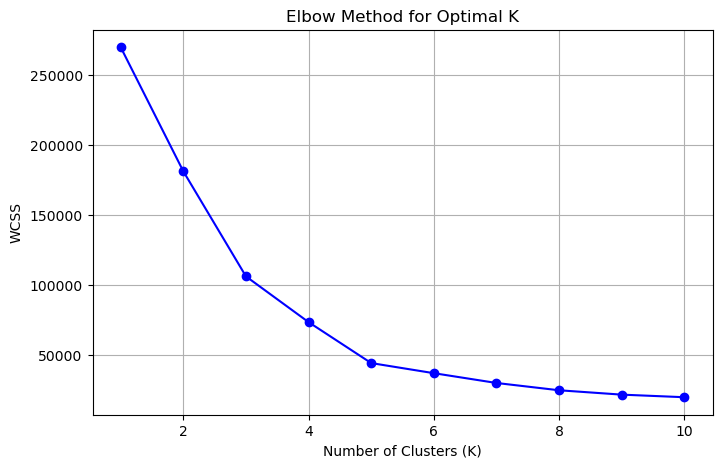

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize an empty list to store the WCSS values
wcss = []

# Create a loop to fit K-means clustering for different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values for different values of k
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [14]:
# !pip install kneed

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for kneed from https://files.pythonhosted.org/packages/9a/1b/7e726d8616e813007874468c61790099ba21493e0ea07561b7d9fc53151c/kneed-0.8.5-py3-none-any.whl.metadata


In [16]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

5

In [23]:
# Perform K-means clustering with the optimal k
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)

In [24]:
# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Display the clustered data
print(data[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())

   Annual Income (k$)  Spending Score (1-100)  Cluster
0                  15                      39        4
1                  15                      81        2
2                  16                       6        4
3                  16                      77        2
4                  17                      40        4


In [27]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [30]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

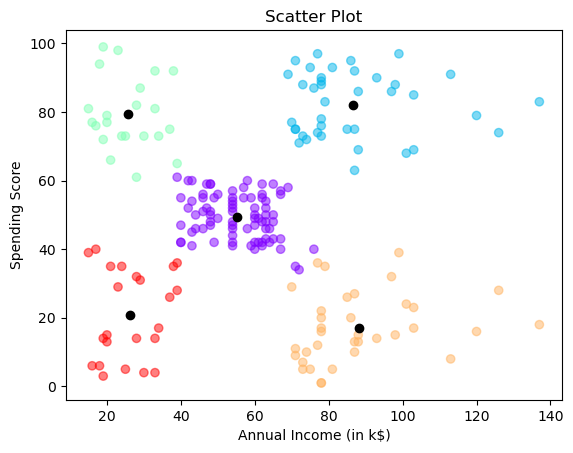

In [29]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='rainbow', alpha=0.5)

plt.plot(kmeans.cluster_centers_[0,0], kmeans.cluster_centers_[0,1], c='k', marker='o')
plt.plot(kmeans.cluster_centers_[1,0], kmeans.cluster_centers_[1,1], c='k', marker='o')
plt.plot(kmeans.cluster_centers_[2,0], kmeans.cluster_centers_[2,1], c='k', marker='o')
plt.plot(kmeans.cluster_centers_[3,0], kmeans.cluster_centers_[3,1], c='k', marker='o')
plt.plot(kmeans.cluster_centers_[4,0], kmeans.cluster_centers_[4,1], c='k', marker='o')

plt.title('Scatter Plot')
plt.xlabel('Annual Income (in k$)')
plt.ylabel('Spending Score')
plt.show()

## Q5

In [32]:
df = pd.read_csv(r"G:\Term 4.2\Data Mining\Lab\Lab Materials(Data Mining)\Data_with_Progms\assoc.csv")
df

,Bread,Jelly,PeanutButter
0,Bread,PeanutButter,NaN
1,Bread,Milk,PeanutButter
2,Beer,Bread,NaN
3,Beer,Milk,NaN


In [33]:
ds = df.shape
ds

(4, 3)

In [34]:
ds[0]

4

In [36]:
transactions = []
for i in range(0, ds[0]):
    transactions.append([str(df.values[i,j]) for j in range(0, ds[1])])

In [37]:
transactions[0]

['Bread', 'PeanutButter', 'nan']

In [38]:
# !pip install apyori

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=ce10532f62284dd5760880a52cfacf98ff8163694aa499a51b18a92cc1beb0b4
  Stored in directory: c:\users\abu bin fahd\appdata\local\pip\cache\wheels\77\3d\a6\d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [39]:
from apyori import apriori
rules = apriori(transactions, min_support = 0.028, min_confidence = 0.3, min_lift=1,min_length=2)
results = list(rules)

In [40]:
results[0]

RelationRecord(items=frozenset({'Beer'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Beer'}), confidence=0.5, lift=1.0)])

In [41]:
for item in results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[-1] + " -> " + items[0])

    #second index of the inner list
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: Beer -> Beer
Support: 0.5
Confidence: 0.5
Lift: 1.0
Rule: Bread -> Bread
Support: 0.75
Confidence: 0.75
Lift: 1.0
Rule: Milk -> Milk
Support: 0.5
Confidence: 0.5
Lift: 1.0
Rule: PeanutButter -> PeanutButter
Support: 0.5
Confidence: 0.5
Lift: 1.0
Rule: nan -> nan
Support: 0.75
Confidence: 0.75
Lift: 1.0
Rule: Milk -> Beer
Support: 0.25
Confidence: 0.5
Lift: 1.0
Rule: nan -> Beer
Support: 0.5
Confidence: 0.5
Lift: 1.0
Rule: Bread -> PeanutButter
Support: 0.5
Confidence: 0.5
Lift: 1.0
Rule: Bread -> nan
Support: 0.5
Confidence: 0.5
Lift: 1.0
Rule: Milk -> PeanutButter
Support: 0.25
Confidence: 0.5
Lift: 1.0
Rule: Bread -> Beer
Support: 0.25
Confidence: 0.5
Lift: 1.0
Rule: nan -> Beer
Support: 0.25
Confidence: 0.5
Lift: 2.0
Rule: Bread -> PeanutButter
Support: 0.25
Confidence: 0.3333333333333333
Lift: 1.3333333333333333
Rule: Bread -> PeanutButter
Support: 0.25
Confidence: 0.3333333333333333
Lift: 1.3333333333333333
